# The zero-temperature structure of a White Dwarf
Juan Pablo Castro and Yannik leitlein

Ecuaciones a integrar                           

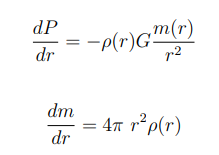 

Ecuaciones auxiliares

 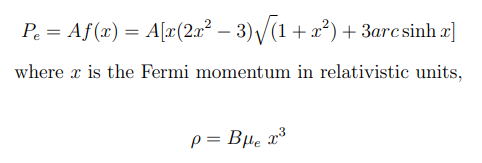

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

its have been change variables P, M, r for them logarithm. Also, we work with the x variable instead of P
Se cambia las variables P, M, r por sus logaritmos y trabajamos con la variable x en vez de con P
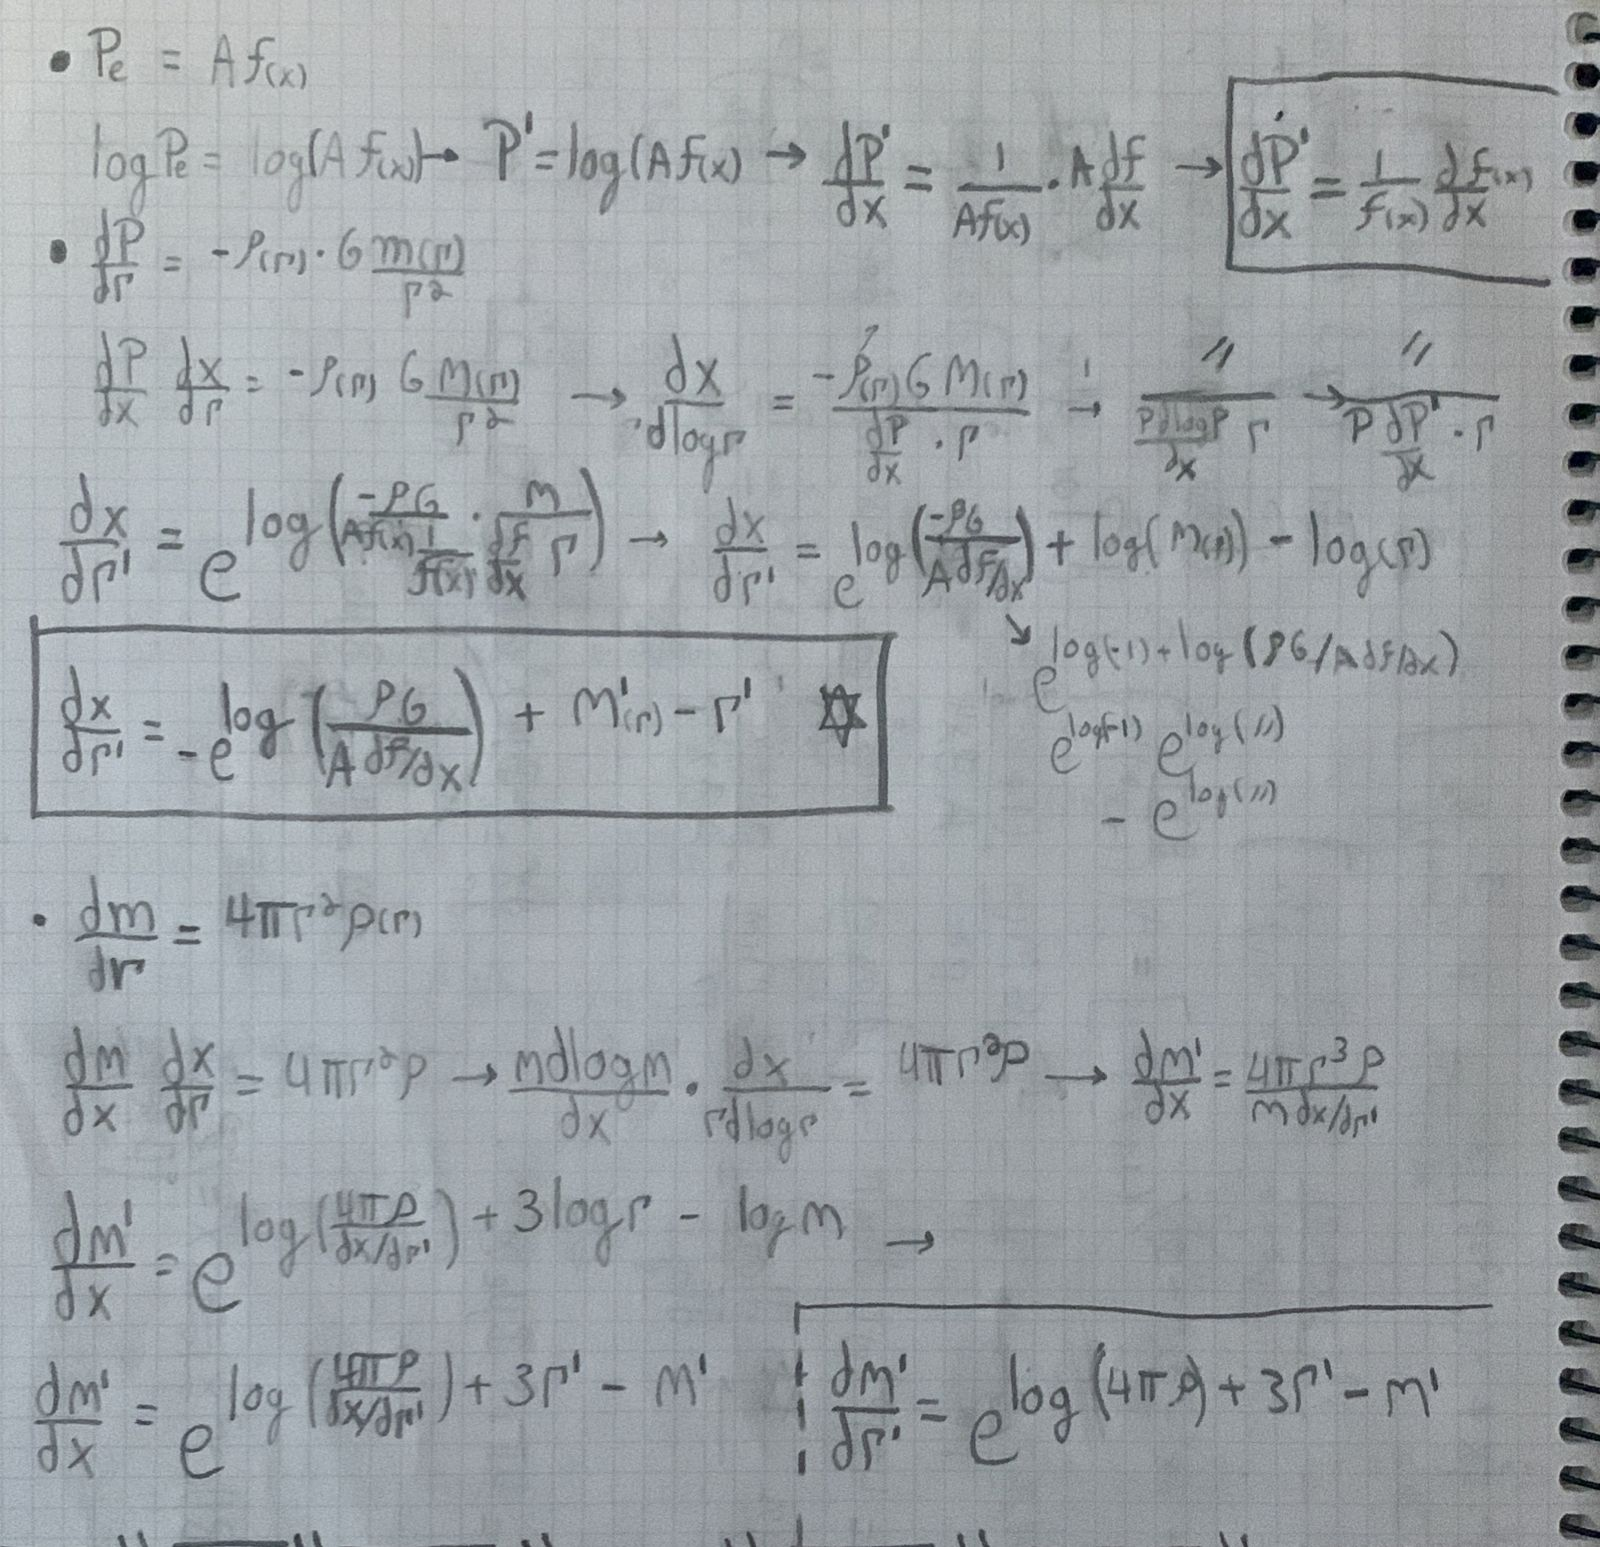

30000000000.0



C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars


10000000 9999999.999999998


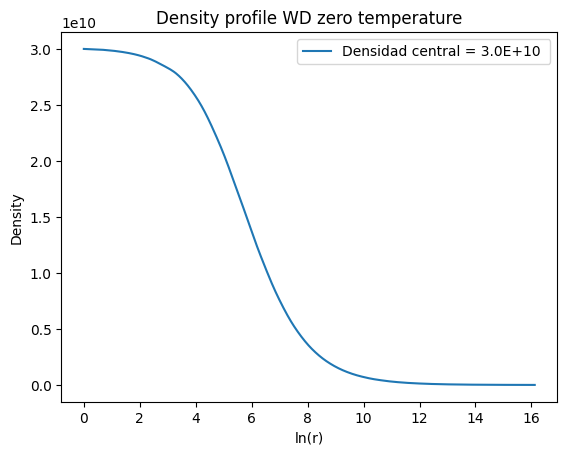

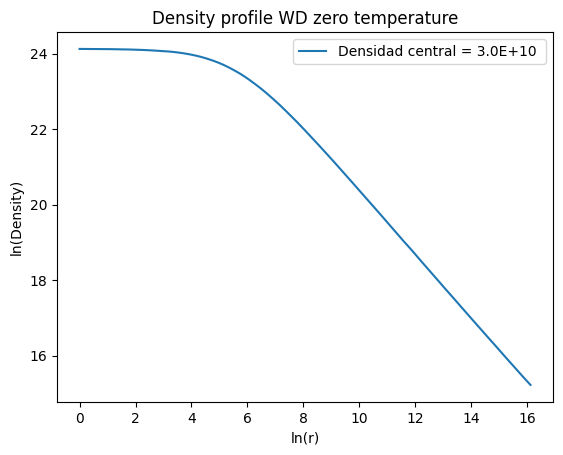

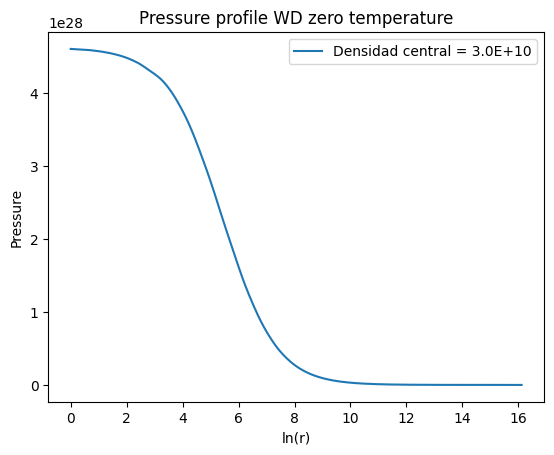

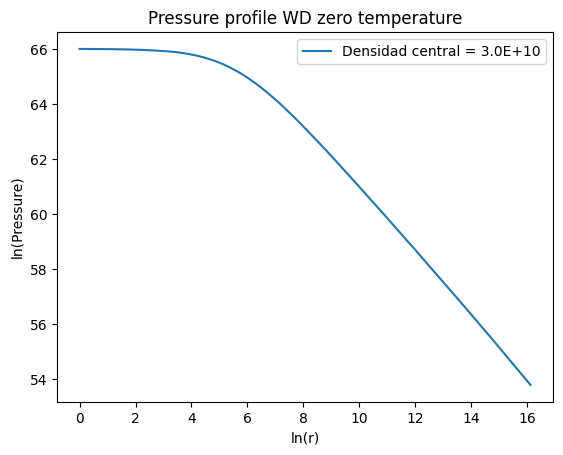

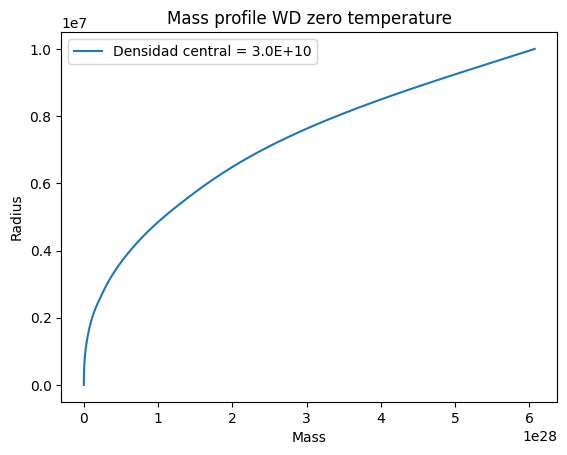

In [43]:
# Segunda forma con las variables logaritmizadas

# Auxiliar functions of the program 
def get_initial_conditions(rho_):
    r_o = 1.0 #1.5 centimetros creó yo
    m_o = 4/3 *r_o**3 *np.pi*rho_  #
    log_m_o = np.log(m_o)
    x_o = (rho_/(B*miu_e))**(1/3)  
    P_o = A*f(x_o)

    return (r_o, m_o, log_m_o , x_o, P_o)


# Ecuaciones auxiliares
def f(x):
    return (  x*(2*x**2 -3)*(1+x**2)**(1/2) + 3*np.arcsinh(x)  )

def dfdx(x):
    return 8*x**4/(1+x**2)**(1/2)

def Rho(x):
    return B*miu_e* x**3

def dPdx(x):
    return (dfdx(x))/(A*f(x))

# Stop condition
def event(t, c_o):
    P = A*f(c_o[0])

    InC = get_initial_conditions(rho_o[i])
    #print(P/InC[-1] - n)
    condition = P/InC[-1] - n

    return condition


#Sistema de ecuacciones diferenciales a integrar
def System_2(r, c_o):    
    x, m = c_o

    dxdr = (-1)*np.e**(np.log(Rho(x)*G/A*dfdx(x)) + m - r )

    dmdx = np.e**( np.log(4*np.pi*Rho(x)/dxdr*(-1)) + 3*r - m)

    return np.array([dxdr,dmdx])

def get_structure_profile(ln_r, x, ln_m):
    # Obtenermos las variables fisicas
    rho_sol = Rho(x) # densidad
    P_sol = A*f(x)
    M_sol = np.e**(ln_m)
    r_sol = np.e**(ln_r)
    return [rho_sol, P_sol, M_sol, r_sol, ln_r, ln_m, x]

# New variables logaraized

def White_dwarf_structure(rho_):
    init_cond = get_initial_conditions(rho_)
    c_o = np.array([init_cond[3], init_cond[2]]) # Inital program conditions

    r = np.linspace(init_cond[0], 1e7 , 10000000) # In centimeters, without zero to avoid singularity
    log_r = np.log(r)

    #integration
    event.terminal = True
    sol_2 = solve_ivp( System_2, (log_r[0],log_r[-1]), c_o, t_eval = log_r, method = 'RK45', events=event)

    # Sacamos los resultados de la integración numerica
    ln_r = sol_2.t
    x = sol_2.y[0]
    ln_m = sol_2.y[1]

    structure_profile = get_structure_profile(ln_r, x, ln_m) 

    return structure_profile



### /////// MAIN PROGRAM \\\\\\\\ ###

# Contants
A = 6.022e22 #cgs
B = 9.74e5#cgs
G = 6.674e-8 #cgs

#Parameters
miu_e = 2 #two nucleons per electron
rho_o = np.array([3e10]) # average density of Sirius B en cgs  

# computational parameters
n = 1e-6 # limit for P(r)/Pc to stop computation 
#/ it is not much smaller because program is delayed
"""
i=0
sol = White_dwarf_structure(rho_o[i])

print(len(sol[-2]), len(sol[-4]))

plt.plot(sol[3],sol[-2])#ln_m(r)
plt.show()
plt.plot(sol[4],sol[2])#M(ln_r)
plt.show()
plt.plot(sol[4],sol[-2]) #ln_m(ln_r)
plt.show()
plt.plot(sol[3], sol[2] ) #M(r)
plt.show()
plt.plot(sol[3],sol[0]) #rho(r)
plt.show()
plt.plot(sol[4],sol[0]) #rho(ln_r)
plt.show()
plt.plot(sol[3],sol[1]) #P(r)
plt.show()
plt.plot(sol[4],sol[1]) #P(ln_r)
plt.show()




"""

strc = [] # strcuture profile

for i in range(len(rho_o)):
    print(rho_o[i])
    print()
    strc.append(White_dwarf_structure(rho_o[i]))


#Grafico de densidad
fig1, ax1= plt.subplots()
fig11, ax11= plt.subplots()
fig2, ax2= plt.subplots()
fig22, ax22= plt.subplots()
fig3, ax3= plt.subplots()
for i in range(len(rho_o)):
    print(len(strc[i][3]), strc[i][3][-1])
    #ax1.plot(strc[i][-3],np.log(strc[i][0]))
    ax1.plot(strc[i][-3], strc[i][0], label=f"Densidad central = {rho_o[i]:.1E} ") #rho(ln_r)
    ax11.plot(strc[i][-3],np.log(strc[i][0]), label=f"Densidad central = {rho_o[i]:.1E} ") #ln_rho(ln_r)
    ax2.plot(strc[i][-3], strc[i][1] , label=f"Densidad central = {rho_o[i]:.1E}") #P(ln_r)
    ax22.plot(strc[i][-3],np.log(strc[i][1]), label=f"Densidad central = {rho_o[i]:.1E}") #ln_P(ln_r)
    #ax3.plot(strc[i][3], strc[i][2], label=f"Densidad central = {rho_o[i]:.1E}") #M(r)
    
    ax3.plot(strc[i][2],strc[i][3],  label=f"Densidad central = {rho_o[i]:.1E}") #r(M)

ax1.legend()
ax11.legend()
ax2.legend()
ax22.legend()
ax3.legend()

ax1.set_title("Density profile WD zero temperature")
ax1.set_xlabel("ln(r)")
ax1.set_ylabel("Density")

ax11.set_title("Density profile WD zero temperature")
ax11.set_xlabel("ln(r)")
ax11.set_ylabel("ln(Density)")

ax2.set_title("Pressure profile WD zero temperature")
ax2.set_xlabel("ln(r)")
ax2.set_ylabel("Pressure")

ax22.set_title("Pressure profile WD zero temperature")
ax22.set_xlabel("ln(r)")
ax22.set_ylabel("ln(Pressure)")

ax3.set_title("Mass profile WD zero temperature")
ax3.set_ylabel("Radius")
ax3.set_xlabel("Mass")

plt.show(fig1)
plt.show(fig11)
plt.show(fig2)
plt.show(fig22)
plt.show(fig3)






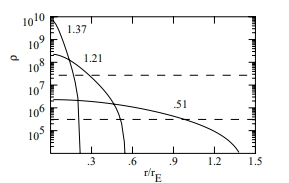

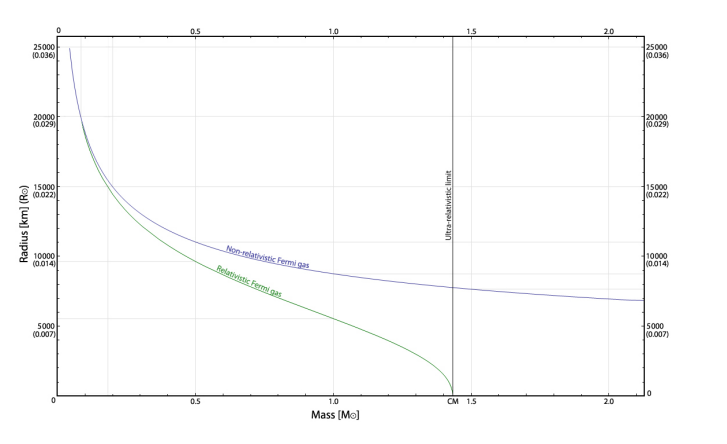

In [45]:
a=np.array([1,2,5,3,14,5,31,6,9])
print(a[-1])

9
